*First compiled: August 17, 2017.*

# Compare with Monocle 2 for minimal datasets

In [1]:
suppressMessages(library(monocle))

Here, we load the data that we exported in [robustness.ipynb](robustness.ipynb).

In [2]:
df <- read.csv('./data/krumsiek11_blobs/X.csv', header=F)
df_anno <- read.csv('./data/krumsiek11_blobs/smp.csv', header=T)
groups_colors <- as.vector(read.csv('data/krumsiek11_blobs/add/aga_groups_colors.csv', header=F)$V1)
names(groups_colors) = c(0:(length(groups_colors)-1))
cds <- newCellDataSet(t(as.matrix(df)), phenoData = new("AnnotatedDataFrame", data = df_anno))

## Reconstructing the tree for the minimal example

We try to reconstruct the tree with different combinations of parameters.

### Using max_components = 2

In [3]:
previous_time <- proc.time()[3]
cds2 <- reduceDimension(cds, verbose = F, max_components = 2) 
cds2 <- orderCells(cds2)
proc.time()[3] - previous_time

Warning message in if (reduction_method == "DPT") {:
“the condition has length > 1 and only the first element will be used”

elapsed 
 13.291

Coloring using the reference clustering "groups".

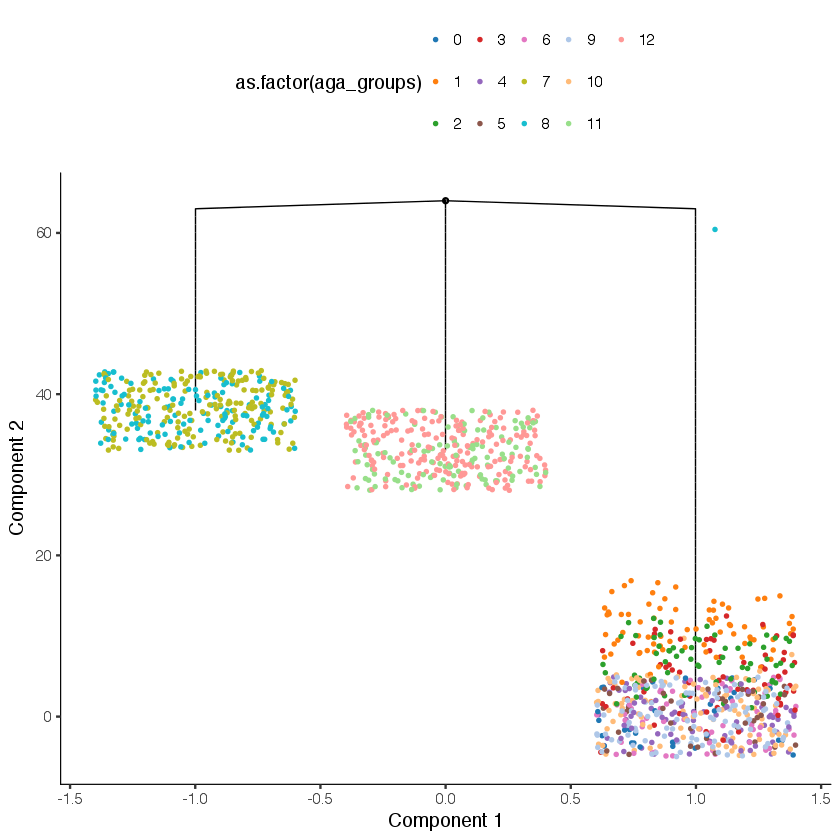

In [4]:
plot_complex_cell_trajectory(cds2, color_by = 'as.factor(aga_groups)', show_branch_points = T,
                             cell_size = 0.5, cell_link_size = 0.3, root_states = c(0)) + scale_color_manual(values = groups_colors)

### Using max_components = 10

In [5]:
previous_time <- proc.time()[3]
cds2 <- reduceDimension(cds, verbose = F, max_components = 10) 
cds2 <- orderCells(cds2)
proc.time()[3] - previous_time

Warning message in if (reduction_method == "DPT") {:
“the condition has length > 1 and only the first element will be used”Warning message in irlba::irlba(C, nv = L, v = initial_v):
“You're computing too large a percentage of total singular values, use a standard svd instead.”Warning message in irlba(C, nv = L, v = initial_v):
“You're computing too large a percentage of total singular values, use a standard svd instead.”Warning message in irlba(C, nv = L, v = initial_v):
“did not converge--results might be invlaid!; try increasing maxit or fastpath=FALSE”Warning message in irlba::irlba(C, nv = L, v = initial_v):
“You're computing too large a percentage of total singular values, use a standard svd instead.”Warning message in irlba(C, nv = L, v = initial_v):
“You're computing too large a percentage of total singular values, use a standard svd instead.”Warning message in irlba(C, nv = L, v = initial_v):
“did not converge--results might be invlaid!; try increasing maxit or fastpath=FALSE”W

elapsed 
 14.962

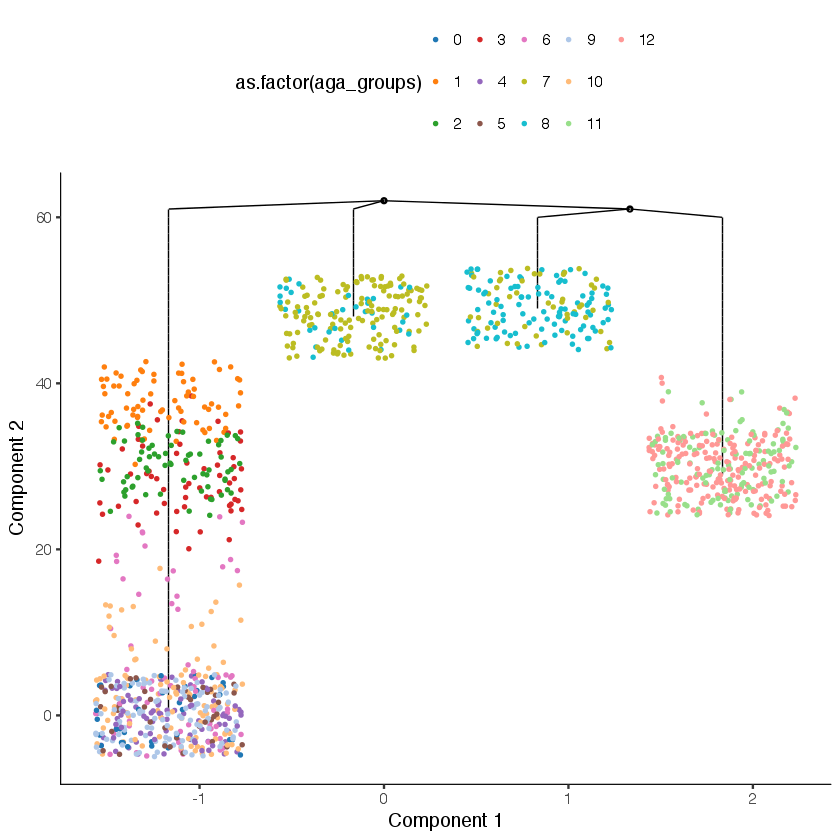

In [6]:
plot_complex_cell_trajectory(cds2, color_by = 'as.factor(aga_groups)', show_branch_points = T,
                             cell_size = 0.5, cell_link_size = 0.3, root_states = c(0)) + scale_color_manual(values = groups_colors)

## Consider the simple tree

In [11]:
df <- read.csv('./data/krumsiek11/X.csv', header=F)
df_anno <- read.csv('./data/krumsiek11/smp.csv', header=T)
groups_colors <- as.vector(read.csv('data/krumsiek11/add/groups_colors.csv', header=F)$V1)
names(groups_colors) = c(0:(length(groups_colors)-1))
cds <- newCellDataSet(t(as.matrix(df)), phenoData = new("AnnotatedDataFrame", data = df_anno))

### Using max_components = 2

In [12]:
previous_time <- proc.time()[3]
cds2 <- reduceDimension(cds, verbose = F, max_components = 2) 
cds2 <- orderCells(cds2)
proc.time()[3] - previous_time

Warning message in if (reduction_method == "DPT") {:
“the condition has length > 1 and only the first element will be used”

elapsed 
 11.264

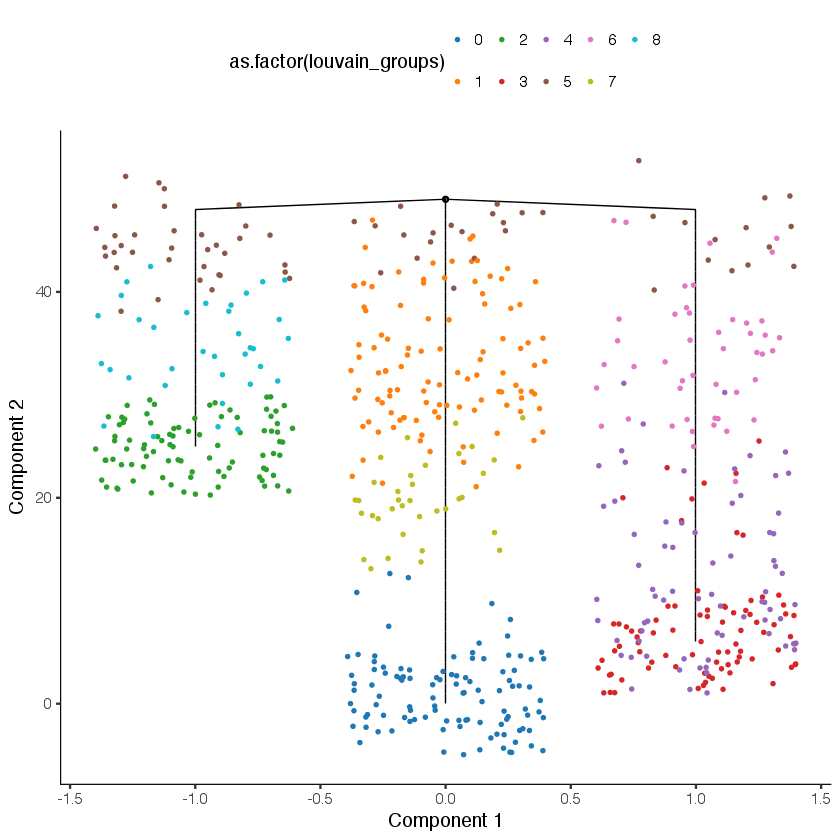

In [13]:
plot_complex_cell_trajectory(cds2, color_by = 'as.factor(groups)', show_branch_points = T,
                             cell_size = 0.5, cell_link_size = 0.3, root_states = c(0)) + scale_color_manual(values = groups_colors)

### Using max_components = 5

In [14]:
previous_time <- proc.time()[3]
cds2 <- reduceDimension(cds, verbose = F, max_components = 5) 
cds2 <- orderCells(cds2)
proc.time()[3] - previous_time

Warning message in if (reduction_method == "DPT") {:
“the condition has length > 1 and only the first element will be used”

elapsed 
 11.305

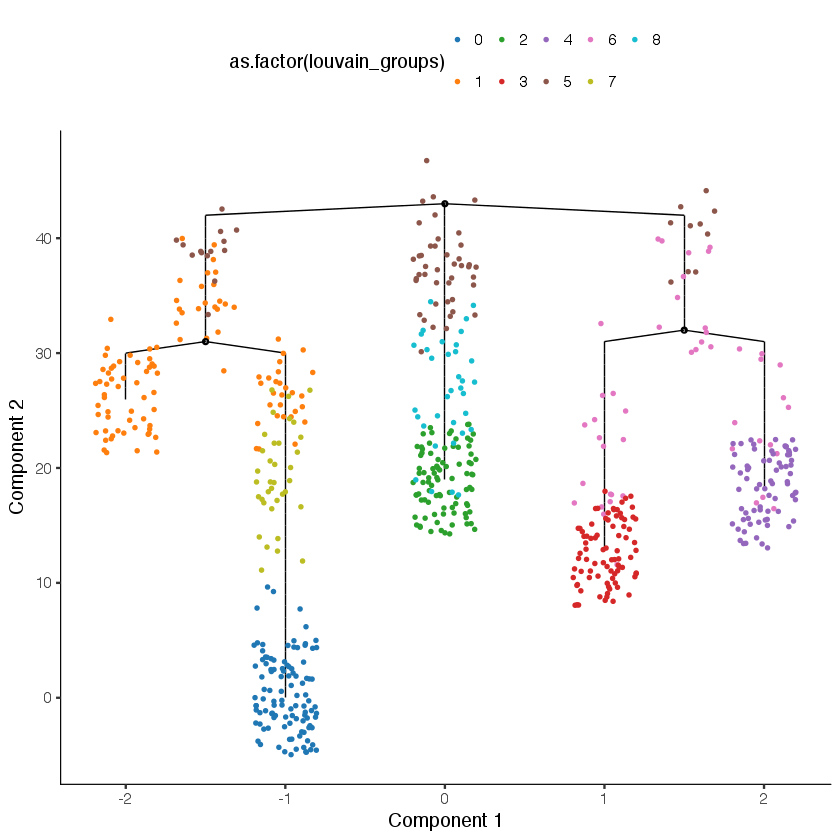

In [15]:
plot_complex_cell_trajectory(cds2, color_by = 'as.factor(groups)', show_branch_points = T,
                             cell_size = 0.5, cell_link_size = 0.3, root_states = c(0)) + scale_color_manual(values = groups_colors)

### Session Info

In [16]:
sessionInfo()

R version 3.3.2 (2016-10-31)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Sierra 10.12.6

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
 [1] splines   stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] monocle_2.2.0         L1Graph_0.1.0         lpSolveAPI_5.5.2.0-17
 [4] simplePPT_0.1.0       igraph_1.0.1          DDRTree_0.1.5        
 [7] irlba_2.2.1           VGAM_1.0-3            ggplot2_2.2.1        
[10] Biobase_2.34.0        BiocGenerics_0.20.0   Matrix_1.2-10        

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.2-6           slam_0.1-40            repr_0.12.0           
 [4] reshape2_1.4.2         lattice_0.20-35        colorspace_1.3-2      
 [7] fastICA_1.2-1          rlang_0.1.1            glue_1.1.1            
[10] RColorBrewer_1.1-2     HSMMSingleCell_0.108.0 bindrcpp_0.2          
[13] uuid_0.1-2             ma